# Multivariate statistics

Multivariate statistics includes all statistical techniques for analyzing samples made of two or more variables.
The data set (a $N \times P$ matrix $\mathbf{X}$) is a collection of $N$ independent samples column **vectors** $[\mathbf{x}_{1}, \ldots, \mathbf{x}_{i}, \ldots, \mathbf{x}_{N}]$ of length $P$

$$
\mathbf{X} =
    \begin{bmatrix}
        -\mathbf{x}_{1}^T- \\
        \vdots \\
        -\mathbf{x}_{i}^T- \\
        \vdots \\
        -\mathbf{x}_{P}^T-
    \end{bmatrix} =
    \begin{bmatrix}
        x_{11} & \cdots & x_{1j} & \cdots & x_{1P} \\
        \vdots &        & \vdots &        & \vdots \\
        x_{i1} & \cdots & x_{ij} & \cdots & x_{iP} \\
        \vdots &        & \vdots &        & \vdots \\
        x_{N1} & \cdots & x_{Nj} & \cdots & x_{NP}
    \end{bmatrix} =
    \begin{bmatrix}
        x_{11} & \ldots     & x_{1P} \\
        \vdots &            & \vdots \\
               & \mathbf{X} & \\
        \vdots &            & \vdots \\
        x_{N1} & \ldots     & x_{NP}
    \end{bmatrix}_{N \times P}.
$$

## Linear Algebra

### Euclidean norm and distance

The Euclidian norm of a vector $\mathbf{a} \in \mathbb{R}^P$ is denoted

$$
\|\mathbf{a}\|_2 = \sqrt{\sum_i^P {a_i}^2}
$$

The Euclidian distance between two vectors $\mathbf{a}, \mathbf{b} \in \mathbb{R}^P$ is

$$
\|\mathbf{a}-\mathbf{b}\|_2 = \sqrt{\sum_i^P (a_i-b_i)^2}
$$

### Dot product and projection

Source: [Wikipedia](https://en.wikipedia.org/wiki/Projection_%28linear_algebra%29)

**Algebraic definition**

The dot product, denoted ''$\cdot$'' of two $P$-dimensional vectors $\mathbf{a} = [a_1, a_2, ..., a_P]$ and $\mathbf{a} = [b_1, b_2, ..., b_P]$ is defined as

$$
\mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T \mathbf{b} = \sum_i a_i b_i =
    \begin{bmatrix}
        a_{1} & \ldots &  \mathbf{a}^T  & \ldots & a_{P}
    \end{bmatrix}
    \begin{bmatrix}
        b_{1}\\
        \vdots \\
        \mathbf{b}\\ 
        \vdots\\
        b_{P}
    \end{bmatrix}.
$$

The Euclidean norm of a vector can be computed using the dot product, as

$$
\left\|\mathbf{a} \right\|_2 = {\sqrt {\mathbf{a} \cdot \mathbf{a}}}.
$$

**Geometric definition: projection**

In Euclidean space, a Euclidean vector is a geometrical object that possesses both a magnitude and a direction. A vector can be pictured as an arrow. Its magnitude is its length, and its direction is the direction that the arrow points. The magnitude of a vector $\mathbf{a}$ is denoted by $\|\mathbf{a}\|_2$. The dot product of two Euclidean vectors $\mathbf{a}$ and $\mathbf{b}$ is defined by

$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a} \|_2\ \|\mathbf{b} \|_2\cos \theta,
$$

where $\theta$ is the angle between $\mathbf{a}$ and $\mathbf{b}$.

In particular, if $\mathbf{a}$ and $\mathbf{b}$ are orthogonal, then the angle between them is 90° and

$$
\mathbf{a} \cdot \mathbf{b} = 0.
$$

At the other extreme, if they are codirectional, then the angle between them is 0° and

$$
\mathbf{a} \cdot \mathbf{b} = \left\|\mathbf{a} \right\|_2\,\left\|\mathbf{b} \right\|_2
$$

This implies that the dot product of a vector $\mathbf{a}$ by itself is

$$
\mathbf{a} \cdot \mathbf{a} = \left\|\mathbf{a} \right\|_2^2.
$$

The scalar projection (or scalar component) of a Euclidean vector $\mathbf{a}$ in the direction of a Euclidean vector $\mathbf{b}$ is given by

$$
a_{b} = \left\|\mathbf{a} \right\|_2\cos \theta,
$$

where $\theta$ is the angle between $\mathbf{a}$ and $\mathbf{b}$.

In terms of the geometric definition of the dot product, this can be rewritten

$$
a_{b} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|_2},
$$

![Projection.](images/Dot_Product.png)

In [5]:
import numpy as np
np.random.seed(42)

a = np.random.randn(10)
b = np.random.randn(10)

np.dot(a, b)

-4.0857885326599241

## Data mean vector

The mean ($P \times 1$) column-vector $\mathbf{\mu}$ whose estimator is
$$
\bar{\mathbf{x}} = \frac{1}{N}\sum_{i=1}^N \mathbf{x_i} =
    \frac{1}{N}\sum_{i=1}^N
        \begin{bmatrix}
            x_{i1}\\
            \vdots\\
            x_{ij}\\
            \vdots\\
            x_{iP}\\
         \end{bmatrix} =
         \begin{bmatrix}
             \bar{x}_{1}\\
             \vdots\\
             \bar{x}_{j}\\
             \vdots\\
             \bar{x}_{P}\\
         \end{bmatrix}.
$$

## Data covariance matrix

- The covariance matrix $\mathbf{\Sigma_{XX}}$ is a **symmetric** positive semi-definite matrix whose element in the $j, k$ position is the covariance between the $j^{th}$ and $k^{th}$ elements of a random vector i.e. the $j^{th}$ and $k^{th}$ columns of $\mathbf{X}$.

- The covariance matrix generalizes the notion of covariance to multiple dimensions.

- The covariance matrix describe the shape of the sample distribution around the mean assuming an elliptical distribution:

$$
\mathbf{\Sigma_{XX}} = E(\mathbf{X}-E(\mathbf{X}))^TE(\mathbf{X}-E(\mathbf{X})),
$$

whose estimator $\mathbf{S_{XX}}$ is a $P \times P$ matrix given by

$$
\mathbf{S_{XX}}= \frac{1}{N-1}(\mathbf{X}- \mathbf{1} \bar{\mathbf{x}}^T)^T (\mathbf{X}- \mathbf{1} \bar{\mathbf{x}}^T).
$$

If we assume that $\mathbf{X}$ is centered, i.e. $\mathbf{X}$ is replaced by $\mathbf{X} - \mathbf{1}\bar{\mathbf{x}}^T$ then the estimator is

$$
\mathbf{S_{XX}} = \frac{1}{N-1} \mathbf{X}^T\mathbf{X} =
    \frac{1}{N-1} \begin{bmatrix}
                      x_{11} & \cdots & x_{N1} \\
                      x_{1j} & \cdots & x_{Nj} \\
                      \vdots &        & \vdots \\
                      x_{1P} & \cdots & x_{NP} \\
                  \end{bmatrix}
                  \begin{bmatrix}
                      x_{11} & \cdots & x_{1k}& x_{1P}\\
                      \vdots &        & \vdots & \vdots\\
                      x_{N1} & \cdots & x_{Nk}& x_{NP}
                  \end{bmatrix}=
                  \begin{bmatrix}
                      s_{1} & \ldots  & s_{1k} & s_{1P}\\
                            & \ddots  & s_{jk} & \vdots\\
                            &         & s_{k}  & s_{kP}\\      
                            &         &        & s_{P}\\
                  \end{bmatrix},
$$

where 

$$
s_{jk} = s_{kj} = \frac{1}{N-1} \mathbf{x_j}^T \mathbf{x_k} = \frac{1}{N-1} \sum_{i=1}^N x_{ij} x_{ik}
$$

is an estimator of the covariance between the $j^{th}$ and $k^{th}$ variables.

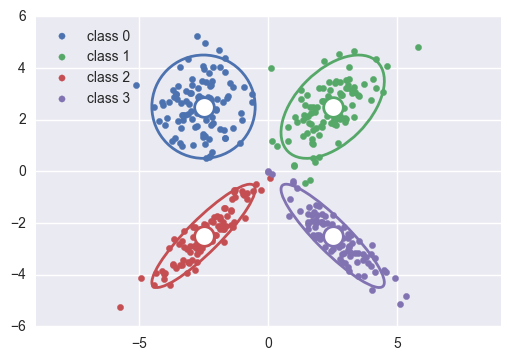

In [6]:
## Avoid warnings and force inline plot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
##
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pystatsml.plot_utils
import seaborn as sns  # nice color

np.random.seed(42)
colors = sns.color_palette()

n_samples, n_features = 100, 2

mean, Cov, X = [None] * 4, [None] * 4, [None] * 4
mean[0] = np.array([-2.5, 2.5])
Cov[0] = np.array([[1, 0],
                   [0, 1]])

mean[1] = np.array([2.5, 2.5])
Cov[1] = np.array([[1, .5],
                   [.5, 1]])

mean[2] = np.array([-2.5, -2.5])
Cov[2] = np.array([[1, .9],
                   [.9, 1]])

mean[3] = np.array([2.5, -2.5])
Cov[3] = np.array([[1, -.9],
                   [-.9, 1]])

# Generate dataset
for i in range(len(mean)):
    X[i] = np.random.multivariate_normal(mean[i], Cov[i], n_samples)

# Plot
for i in range(len(mean)):
    # Points
    plt.scatter(X[i][:, 0], X[i][:, 1], color=colors[i], label="class %i" % i)
    # Means
    plt.scatter(mean[i][0], mean[i][1], marker="o", s=200, facecolors='w',
                edgecolors=colors[i], linewidth=2)
    # Ellipses representing the covariance matrices
    pystatsml.plot_utils.plot_cov_ellipse(Cov[i], pos=mean[i], facecolor='none',
                                          linewidth=2, edgecolor=colors[i])

plt.axis('equal')
_ = plt.legend(loc='upper left')

## Mahalanobis distance

- The Mahalanobis distance is a measure of the distance between two points $\mathbf{x}$ and $\mathbf{\mu}$ where the dispersion (i.e. the covariance structure) of the samples is taken into account.

- The dispersion is considered through covariance matrix.

**Intuitions**

- Distances along the principal directions of dispersion are contracted since they correspond to likely dispersion of points.

- Distances othogonal to the principal directions of dispersion are dilated since they correspond to unlikely dispersion of points. 

This is formally expressed as

$$
D_M(\mathbf{x}, \mathbf{\mu}) = \sqrt{(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})}.
$$

### Example

Euclidian   d(m, x1) = 2.00 < d(m, x2) = 2.83
Mahalanobis d(m, x1) = 3.33 > d(m, x2) = 2.11


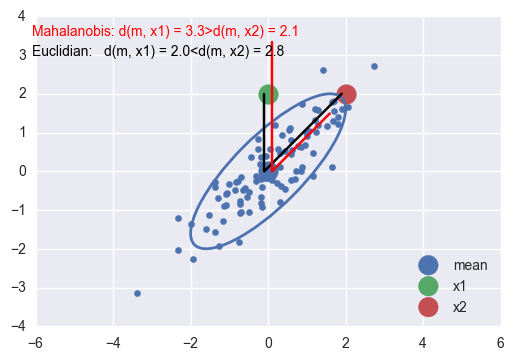

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pystatsml.plot_utils
%matplotlib inline
np.random.seed(40)
colors = sns.color_palette()

mean = np.array([0, 0]) 
Cov = np.array([[1, .8],
                [.8, 1]])
samples = np.random.multivariate_normal(mean, Cov, 100)
x1 = np.array([0, 2])
x2 = np.array([2, 2])

plt.scatter(samples[:, 0], samples[:, 1], color=colors[0])
plt.scatter(mean[0], mean[1], color=colors[0], s=200, label="mean")
plt.scatter(x1[0], x1[1], color=colors[1], s=200, label="x1")
plt.scatter(x2[0], x2[1], color=colors[2], s=200, label="x2")

# plot covariance ellipsis
pystatsml.plot_utils.plot_cov_ellipse(Cov, pos=mean, facecolor='none', 
                                      linewidth=2, edgecolor=colors[0])
# Compute distances
d2_m_x1 = scipy.spatial.distance.euclidean(mean, x1)
d2_m_x2 = scipy.spatial.distance.euclidean(mean, x2)

Covi = scipy.linalg.inv(Cov)
dm_m_x1 = scipy.spatial.distance.mahalanobis(mean, x1, Covi)
dm_m_x2 = scipy.spatial.distance.mahalanobis(mean, x2, Covi)

# Plot distances
vm_x1 = (x1 - mean) / d2_m_x1
vm_x2 = (x2 - mean) / d2_m_x2
jitter = .1
plt.plot([mean[0] - jitter, d2_m_x1 * vm_x1[0] - jitter],
         [mean[1], d2_m_x1 * vm_x1[1]], color='k')
plt.plot([mean[0] - jitter, d2_m_x2 * vm_x2[0] - jitter],
         [mean[1], d2_m_x2 * vm_x2[1]], color='k')

plt.plot([mean[0] + jitter, dm_m_x1 * vm_x1[0] + jitter],
         [mean[1], dm_m_x1 * vm_x1[1]], color='r')
plt.plot([mean[0] + jitter, dm_m_x2 * vm_x2[0] + jitter],
         [mean[1], dm_m_x2 * vm_x2[1]], color='r')

plt.legend(loc='lower right')
plt.text(-6.1, 3,
         'Euclidian:   d(m, x1) = %.1f<d(m, x2) = %.1f' % (d2_m_x1, d2_m_x2), color='k')
plt.text(-6.1, 3.5,
         'Mahalanobis: d(m, x1) = %.1f>d(m, x2) = %.1f' % (dm_m_x1, dm_m_x2), color='r')

plt.axis('equal')
print('Euclidian   d(m, x1) = %.2f < d(m, x2) = %.2f' % (d2_m_x1, d2_m_x2))
print('Mahalanobis d(m, x1) = %.2f > d(m, x2) = %.2f' % (dm_m_x1, dm_m_x2))

If the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance. If the covariance matrix is diagonal, then the resulting distance measure is called a normalized Euclidean distance.

More generally, the Mahalanobis distance is a measure of the distance between a point $\mathbf{x}$ and a distribution $\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})$. It is a multi-dimensional generalization of the idea of measuring how many standard deviations away $\mathbf{x}$ is from the mean. This distance is zero if $\mathbf{x}$ is at the mean, and grows as $\mathbf{x}$ moves away from the mean: along each principal component axis, it measures the number of standard deviations from $\mathbf{x}$ to the mean of the distribution.

## Multivariate normal distribution

The distribution, or probability density function (PDF) (somtimes just density), of a continuous random variable is a function that describes the relative likelihood for this random variable to take on a given value.

The multivariate normal distribution, or multivariate Gaussian distribution, of a $P$-dimensional random vector $\mathbf{x} = [x_1, x_2, \ldots, x_P]^T$ is

$$
\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{P/2}|\mathbf{\Sigma}|^{1/2}}\exp\{-\frac{1}{2} (\mathbf{x} - \mathbf{\mu)}^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\}.
$$

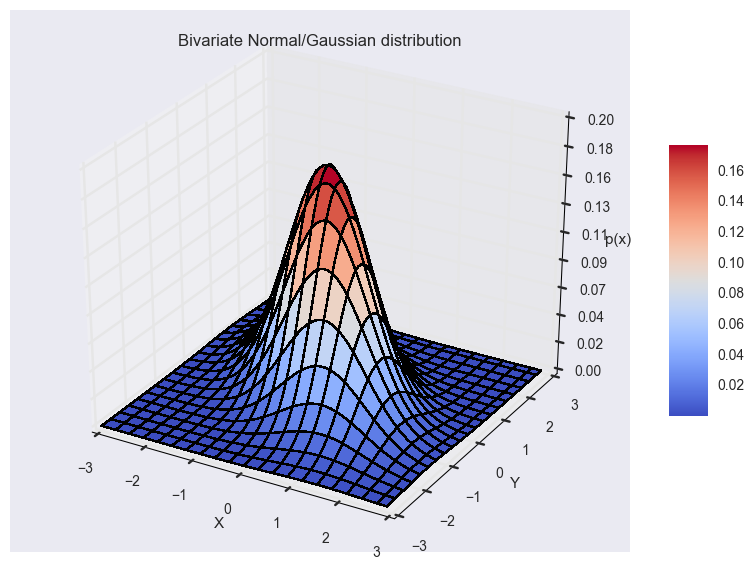

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


def multivariate_normal_pdf(X, mean, sigma):
    """Multivariate normal probability density function over X (n_samples x n_features)"""
    P = X.shape[1]
    det = np.linalg.det(sigma)
    norm_const = 1.0 / (((2*np.pi) ** (P/2)) * np.sqrt(det))
    X_mu = X - mu
    inv = np.linalg.inv(sigma)
    d2 = np.sum(np.dot(X_mu, inv) * X_mu, axis=1)
    return norm_const * np.exp(-0.5 * d2)

# mean and covariance
mu = np.array([0, 0])
sigma = np.array([[1, -.5],
                  [-.5, 1]])

# x, y grid
x, y = np.mgrid[-3:3:.1, -3:3:.1]
X = np.stack((x.ravel(), y.ravel())).T
norm = multivariate_normal_pdf(X, mean, sigma).reshape(x.shape)

# Do it with scipy
norm_scpy = multivariate_normal(mu, sigma).pdf(np.stack((x, y), axis=2))
assert np.allclose(norm, norm_scpy)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, norm, rstride=3,
        cstride=3, cmap=plt.cm.coolwarm,
        linewidth=1, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Normal/Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)
plt.show()

## Exercises

### Dot product and Euclidean norm

Given $\mathbf{a} = [2, 1]^T$ and $\mathbf{b} = [1, 1]^T$

1. Write a function `euclidian(x)` that computes the Euclidian norm of vector, $\mathbf{x}$.
2. Compute the Euclidean norm of $\mathbf{a}$.
3. Compute the Euclidean distance of $\|\mathbf{a}-\mathbf{b}\|_2$.
4. Compute the projection of $\mathbf{b}$ in the direction of vector $\mathbf{a}$: $b_{a}$.
5. Simulate a dataset $\mathbf{X}$ of $N=100$ samples of 2-dimensional vectors.
6. Project all samples in the direction of the vector $\mathbf{a}$.

### Covariance matrix and Mahalanobis norm

1. Sample a dataset $\mathbf{X}$ of $N=100$ samples of 2-dimensional vectors from the bivariate normal distribution
$\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$ where $\mathbf{\mu}=[1, 1]^T$ and $\mathbf{\Sigma}=\begin{bmatrix} 1 & 0.8\\0.8, 1 \end{bmatrix}$.
2. Compute the mean vector $\mathbf{\bar{x}}$ and center $\mathbf{X}$. Compare the estimated mean $\mathbf{\bar{x}}$ to the true mean, $\mathbf{\mu}$.
3. Compute the empirical covariance matrix $\mathbf{S}$. Compare the estimated covariance matrix $\mathbf{S}$ to the true covariance matrix, $\mathbf{\Sigma}$.
4. Compute $\mathbf{S}^{-1}$ (`Sinv`) the inverse of the covariance matrix by using `scipy.linalg.inv(S)`.
5. Write a function `mahalanobis(x, xbar, Sinv)` that computes the Mahalanobis distance of a vector $\mathbf{x}$ to the mean, $\mathbf{\bar{x}}$.
6. Compute the Mahalanobis and Euclidian distances of each sample $\mathbf{x}_i$ to the mean $\mathbf{\bar{x}}$. Store the results in a $100 \times 2$ dataframe.